# Fractional Brownian Motion (fBm)

**Fractional Brownian Motion (fBm)** is a mathematical model used to describe a type of stochastic process that exhibits long-range dependence and self-similarity. It is an extension of standard Brownian Motion (BM), also known as a Wiener process. While standard Brownian Motion has a constant Hurst index of 0.5, fBm allows for a variable Hurst index (H), which governs its behavior.



In [77]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
import fbm

## Using scipy gamma library

In [67]:
def fractional_brownian_motion(T, H, S0, sigma):

    t = np.linspace(0, T, T+1)
    Z = np.random.normal(0, 1, size=T+1) 

    X = np.zeros(T+1)
    X[0] = S0
    for i in range(1,T+1):
        X[i] = X[i-1] + sigma*(gamma(H+0.5)/gamma(H-0.5))**(1/2) * (t[i]**H - (t[i-1])**H) * Z[i]

    df = pd.DataFrame({'Time': t, 'Price': X}) 
    
    return df

In [68]:
def plot_brownian_motion(df):
    # Plot results  
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df['Time'], df['Price'], color='blue', label='Prices')
    ax.set_title(f"Fractional Brownian Motion - H={H}")
    ax.grid(True)

    # Display legend
    ax.legend()

    # Show the plot
    plt.show()

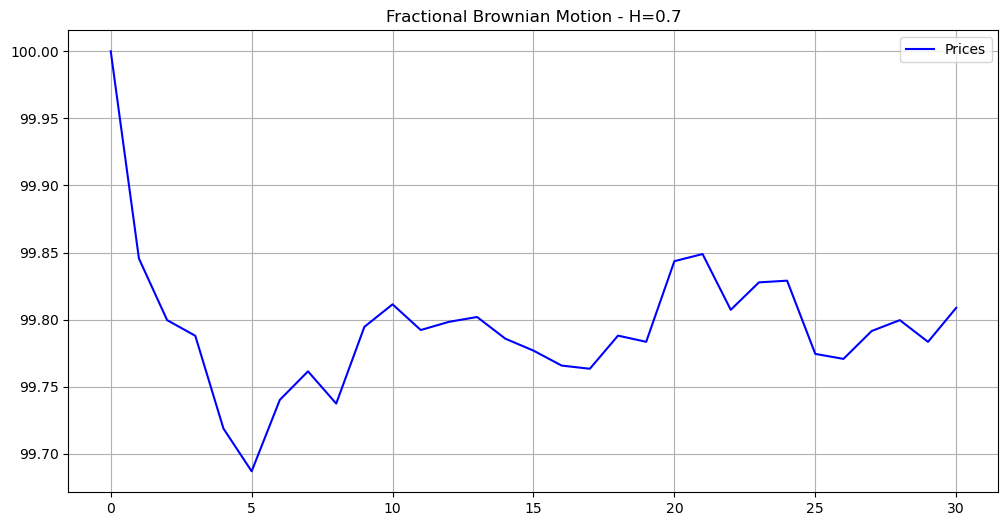

,Time,Price
0,0.0,100.000000
1,1.0,99.845605
2,2.0,99.799703
3,3.0,99.788025
4,4.0,99.718878
5,5.0,99.687076
6,6.0,99.740288
7,7.0,99.761531
8,8.0,99.737519
9,9.0,99.794679


In [90]:
T = 30 # Total time steps
H = 0.7 # Hurst parameter
S0 = 100 # Initial price
sigma = 0.2  

fbm = fractional_brownian_motion(T, H, S0, sigma)
fbm.to_csv('fractional_brownian_motion.csv', index=False)
plot_brownian_motion(fbm)
fbm.head(10)

## Using fbm library

In [87]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
import fbm

In [88]:
def generate_fbm(n, Hurst_index):
    # Generate an fBm path
    t = np.linspace(0, 30, n)
    fbm_path = fbm.fbm(n-1, Hurst_index)

    # Create a DataFrame
    df = pd.DataFrame({'Time': t, 'Price': fbm_path})
    
    return df

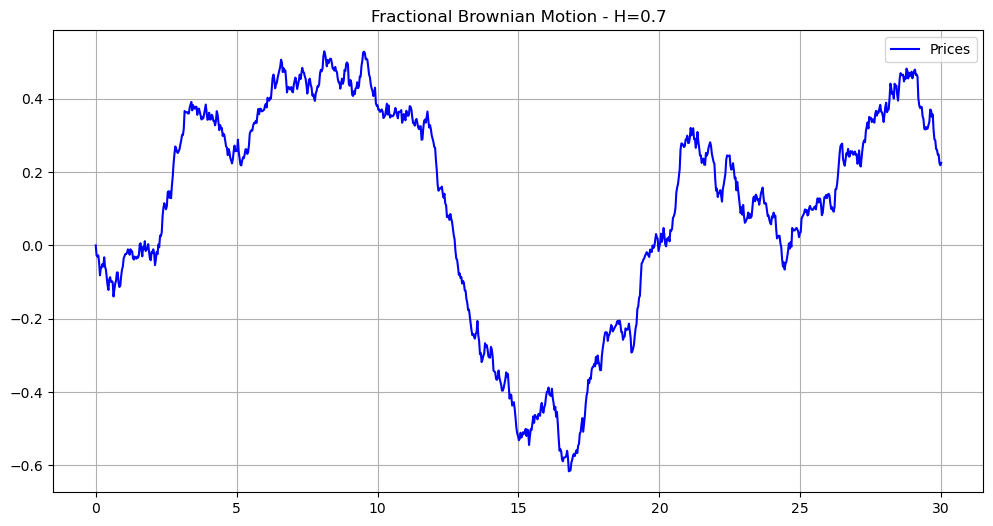

,Time,Price
0,0.00000,0.000000
1,0.03003,-0.027083
2,0.06006,-0.030643
3,0.09009,-0.027250
4,0.12012,-0.047412
5,0.15015,-0.081578
6,0.18018,-0.060325
7,0.21021,-0.060372
8,0.24024,-0.050445
9,0.27027,-0.057170


In [89]:
# Parameters
n = 1000  # Number of points in the fBm path
Hurst_index = 0.6  # Hurst index (controls the roughness of the path)

# Generate an fBm path and store it in a DataFrame
fbm_df = generate_fbm(n, Hurst_index)

# Print the first few rows of the DataFrame
fbm_df.to_csv('fractional_brownian_motion_fbm.csv', index=False)
plot_brownian_motion(fbm_df)
fbm_df.head(10)